In [1]:
import cptac
import scipy
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import statistics
import parse_correlations_dataframe as get_corr
import copy

In [2]:
cptac.download("endometrial")
en = cptac.Endometrial()

In [37]:
def find_mut_tumor(cancer_type, gene):
    try:
        gene_multi = cancer_type.multi_join({'proteomics': gene, 'transcriptomics': gene, 'somatic_mutation': gene}, tissue_type = 'tumor', flatten = True)
        normal = cancer_type.multi_join({'proteomics': gene, 'transcriptomics': gene}, tissue_type= 'normal', flatten = True)
        normal.columns = ['proteomics', 'transcriptomics']
        gene_multi.columns = ['proteomics', 'transcriptomics', 'mutation', 'location', 'mutation_status']
        trans = list(gene_multi["transcriptomics"])
        prot = list(gene_multi['proteomics'])
        group = []
        for i in gene_multi['mutation_status']:
            if type(i) == str:
                group.append("mutation")
            else:
                group.append("wt") 
        if group.count('wt') < 2 or len(normal) < 2:
            return float("NaN")
        group.extend(['normal']*len(normal))
        prot.extend(list(normal['proteomics']))
        trans.extend(list(normal['transcriptomics']))
        gene_df = pd.DataFrame({'Type': group, 'Proteomics': prot, 'Transcriptomics': trans})
        gene_df = gene_df.dropna()
        return gene_df
    except:
        return float("NaN")
   

In [4]:
def get_df_with_type(df,input_type):
    return(df.loc[df['Type']==input_type])

In [21]:
df = find_mut_tumor(en, 'TP53')

            proteomics  transcriptomics             mutation   location  \
Patient_ID                                                                
C3L-00006       0.2950            11.62  [Missense_Mutation]  [p.R248W]   
C3L-00008       0.2770            11.83                  NaN        NaN   
C3L-00032      -0.8710            10.73                  NaN        NaN   
C3L-00090      -0.3430            10.95                  NaN        NaN   
C3L-00098       3.0100            10.69  [Missense_Mutation]  [p.S241C]   
...                ...              ...                  ...        ...   
C3N-01520      -0.2570            11.48                  NaN        NaN   
C3N-01521       1.2000            11.20  [Missense_Mutation]  [p.H193L]   
C3N-01537      -0.0333            10.88                  NaN        NaN   
C3N-01802       0.2920             9.87  [Missense_Mutation]   [p.P27S]   
C3N-01825       1.5100            11.02  [Missense_Mutation]  [p.R175H]   

            mutation_sta

cptac warning: You tried to flatten a column index that didn't have multiple levels, so we didn't actually change anything. (C:\Users\nanel\anaconda3\lib\site-packages\cptac\dataset.py, line 697)
cptac warning: You tried to flatten a column index that didn't have multiple levels, so we didn't actually change anything. (C:\Users\nanel\anaconda3\lib\site-packages\cptac\dataset.py, line 697)


In [6]:
df

,Type,Proteomics,Transcriptomics
0,mutation,0.2950,11.62
1,wt,0.2770,11.83
2,wt,-0.8710,10.73
3,wt,-0.3430,10.95
4,mutation,3.0100,10.69
...,...,...,...
115,normal,0.7950,9.83
116,normal,0.6270,10.64
119,normal,-0.2370,9.62
120,normal,-0.7290,10.45


In [7]:
df2 = get_df_with_type(df,"normal")

In [8]:
df2

,Type,Proteomics,Transcriptomics
95,normal,-0.0919,9.87
96,normal,-0.5930,10.52
98,normal,-0.1310,9.98
99,normal,-0.0844,9.92
113,normal,0.5140,10.35
114,normal,0.2500,10.27
115,normal,0.7950,9.83
116,normal,0.6270,10.64
119,normal,-0.2370,9.62
120,normal,-0.7290,10.45


In [9]:
df2.corr(method="pearson")

,Proteomics,Transcriptomics
Proteomics,1.000000,-0.045068
Transcriptomics,-0.045068,1.000000


In [42]:
df2.corr(method="pearson")['Transcriptomics'][0]

-0.04506791545565061

In [10]:
df3 = df[df['Type'] != 'mutation']

In [11]:
def get_cancer_string(cancer):
    if cancer == brca:
        return "brca"
    if cancer == ccrcc:
        return "ccrcc"
    if cancer == colon:
        return 'colon'
    if cancer == en:
        return 'en'
    if cancer == gbm:
        return 'gbm'
    if cancer == luad:
        return 'luad'
    if cancer == ovarian:
        return 'ovarian'
    if cancer == hnscc:
        return 'hnscc'
    if cancer == lscc:
        return 'lscc'

In [12]:
brca = cptac.Brca()
ccrcc = cptac.Ccrcc()
colon = cptac.Colon()
en = cptac.Endometrial()
gbm = cptac.Gbm()
luad = cptac.Luad()
ovarian = cptac.Ovarian()
hnscc  = cptac.Hnscc()
lscc = cptac.Lscc()

cptac warning: The GBM dataset is under publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (<ipython-input-12-0467c23f8dc0>, line 5)


cptac warning: The HNSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (<ipython-input-12-0467c23f8dc0>, line 8)


cptac warning: The LSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (<ipython-input-12-0467c23f8dc0>, line 9)


In [13]:
cancer_genes = ['ABL1','BRAF','FAT1','IDH1','TP53','BRCA2','KMT2D','KRAS','PIK3CA','PTEN','SETD2','SPTA1']
cancer_list = [brca,ccrcc,colon,en,gbm,luad,ovarian,hnscc,lscc]

In [44]:
cancer_type = []
genes = []
gene_dfs = []
norm_corr = []
wt_corr = []
for cancer in cancer_list:
    for gene in cancer_genes:
        if gene == 'KRAS' and cancer == ccrcc:
            continue
        df = find_mut_tumor(cancer, gene)
        if type(df) == pd.DataFrame:
            genes.append(gene)
            cancer_type.append(get_cancer_string(cancer))
            gene_dfs.append(df)
            norm_df = get_df_with_type(df,"normal")
            wt_df = get_df_with_type(df, 'wt')
            norm_cor = norm_df.corr(method="pearson")['Transcriptomics'][0]
            wt_cor = wt_df.corr(method="pearson")['Transcriptomics'][0]
            norm_corr.append(norm_cor)
            wt_corr.append(wt_cor)
norm_vs_wt_tumor = pd.DataFrame({'cancer': cancer_type, 'gene': genes, 'gene_df': gene_dfs,'normal_correlation': norm_corr, 'tumor_non-mutated_correlation': wt_corr})
norm_vs_wt_tumor.head()           


cptac warning: You tried to flatten a column index that didn't have multiple levels, so we didn't actually change anything. (C:\Users\nanel\anaconda3\lib\site-packages\cptac\dataset.py, line 697)
cptac warning: You tried to flatten a column index that didn't have multiple levels, so we didn't actually change anything. (C:\Users\nanel\anaconda3\lib\site-packages\cptac\dataset.py, line 697)
cptac warning: You tried to flatten a column index that didn't have multiple levels, so we didn't actually change anything. (C:\Users\nanel\anaconda3\lib\site-packages\cptac\dataset.py, line 697)
cptac warning: You tried to flatten a column index that didn't have multiple levels, so we didn't actually change anything. (C:\Users\nanel\anaconda3\lib\site-packages\cptac\dataset.py, line 697)
cptac warning: You tried to flatten a column index that didn't have multiple levels, so we didn't actually change anything. (C:\Users\nanel\anaconda3\lib\site-packages\cptac\dataset.py, line 697)
cptac warning: You t

cptac warning: You tried to flatten a column index that didn't have multiple levels, so we didn't actually change anything. (C:\Users\nanel\anaconda3\lib\site-packages\cptac\dataset.py, line 697)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: BRCA2 (<ipython-input-37-d98f306443a4>, line 4)
cptac warning: You tried to flatten a column index that didn't have multiple levels, so we didn't actually change anything. (C:\Users\nanel\anaconda3\lib\site-packages\cptac\dataset.py, line 697)
cptac warning: You tried to flatten a column index that didn't have multiple levels, so we didn't actually change anything. (C:\Users\nanel\anaconda3\lib\site-packages\cptac\dataset.py, line 697)
cptac warning: You tried to flatten a column index that didn't have multiple levels, so we didn't actually change anything. (C:\Users\nanel\anaconda3\lib\site-packages\cptac\dataset.py, line 697)
cptac warning: You tried 

,cancer,gene,gene_df,normal_correlation,tumor_non-mutated_correlation
0,ccrcc,ABL1,Type Proteomics Transcriptomics 0 ...,0.289991,0.550327
1,ccrcc,FAT1,Type Proteomics Transcriptomics 0 ...,0.409362,0.596427
2,ccrcc,TP53,Type Proteomics Transcriptomics 2 ...,-0.278706,0.092992
3,ccrcc,BRCA2,Type Proteomics Transcriptomics 2 ...,-0.662538,-0.341958
4,ccrcc,KMT2D,Type Proteomics Transcriptomics 0 ...,-0.071417,0.077649


In [45]:
norm_vs_wt_tumor = norm_vs_wt_tumor.assign(corr_dif = abs(norm_vs_wt_tumor['normal_correlation'] - norm_vs_wt_tumor['tumor_non-mutated_correlation']))
norm_vs_wt_tumor.head()

,cancer,gene,gene_df,normal_correlation,tumor_non-mutated_correlation,corr_dif
0,ccrcc,ABL1,Type Proteomics Transcriptomics 0 ...,0.289991,0.550327,0.260337
1,ccrcc,FAT1,Type Proteomics Transcriptomics 0 ...,0.409362,0.596427,0.187065
2,ccrcc,TP53,Type Proteomics Transcriptomics 2 ...,-0.278706,0.092992,0.371698
3,ccrcc,BRCA2,Type Proteomics Transcriptomics 2 ...,-0.662538,-0.341958,0.320580
4,ccrcc,KMT2D,Type Proteomics Transcriptomics 0 ...,-0.071417,0.077649,0.149065


In [46]:
norm_vs_wt_tumor = norm_vs_wt_tumor.sort_values(by = 'corr_dif', ascending=False, ignore_index=True)
norm_vs_wt_tumor.head()

,cancer,gene,gene_df,normal_correlation,tumor_non-mutated_correlation,corr_dif
0,lscc,TP53,Type Proteomics Transcriptomics 0 ...,-0.344411,0.800819,1.145229
1,gbm,IDH1,Type Proteomics Transcriptomics 0 ...,-0.320068,0.724497,1.044565
2,gbm,KMT2D,Type Proteomics Transcriptomics 0 ...,-0.814371,0.162073,0.976444
3,gbm,ABL1,Type Proteomics Transcriptomics 0 ...,-0.446110,0.455234,0.901344
4,en,SETD2,Type Proteomics Transcriptomics 0 ...,-0.355628,0.526838,0.882466


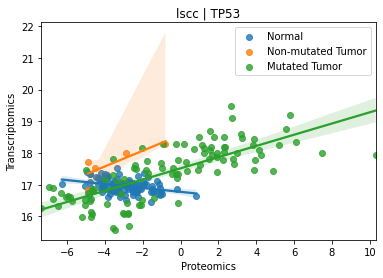

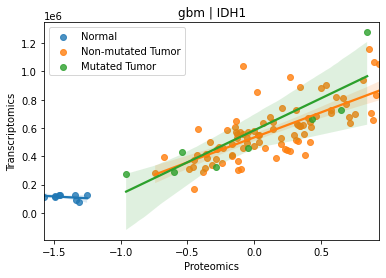

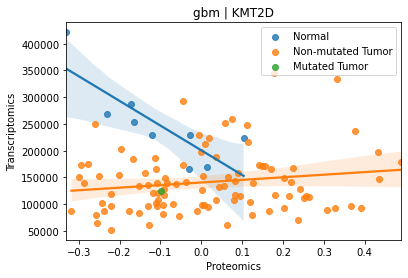

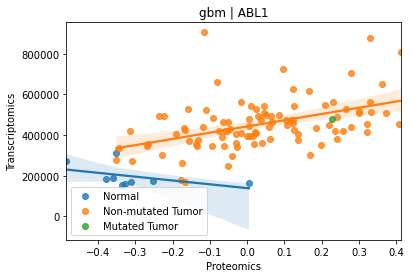

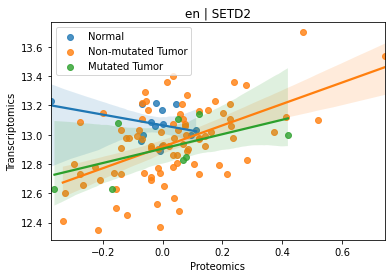

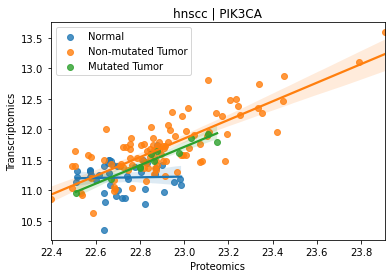

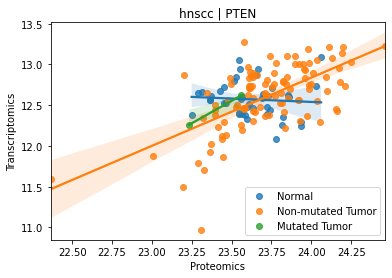

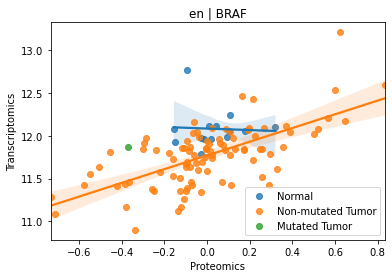

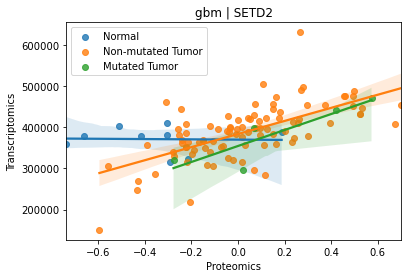

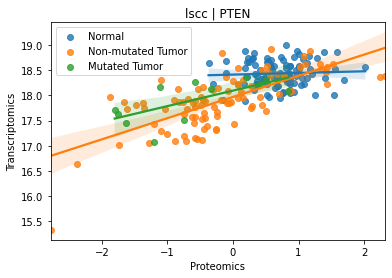

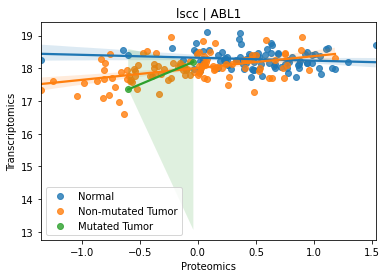

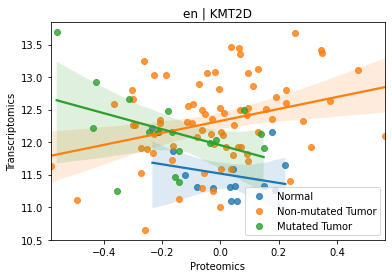

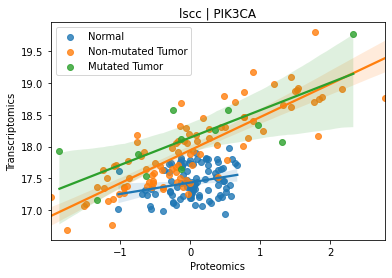

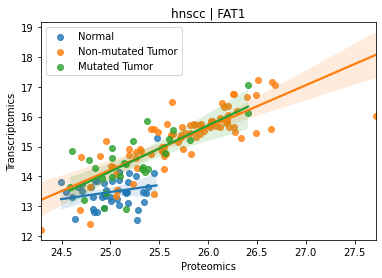

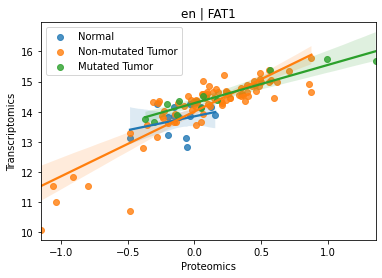

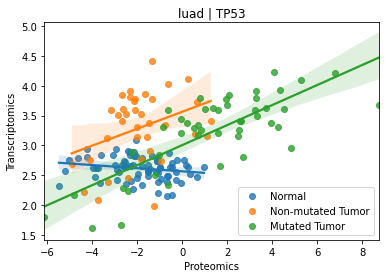

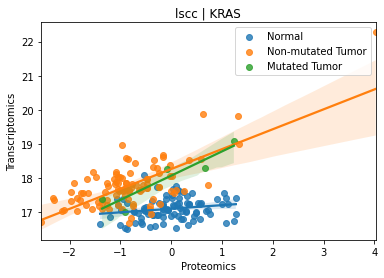

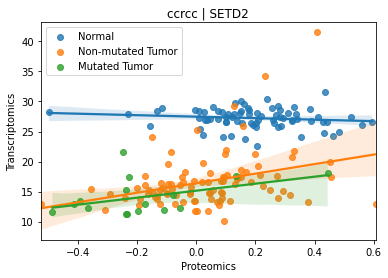

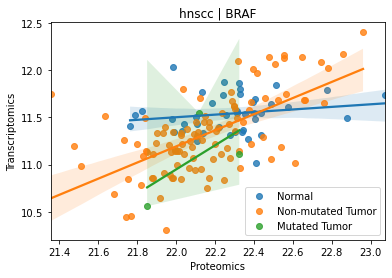

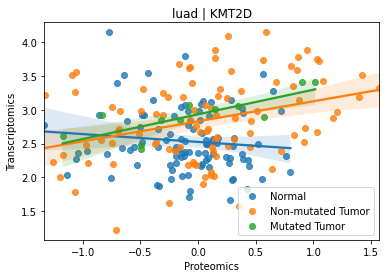

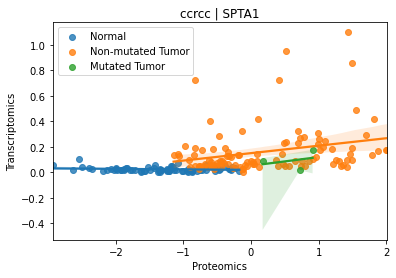

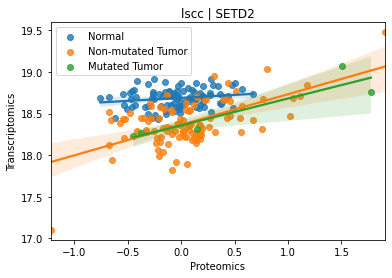

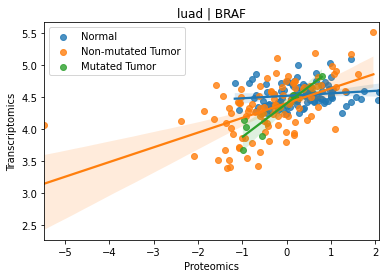

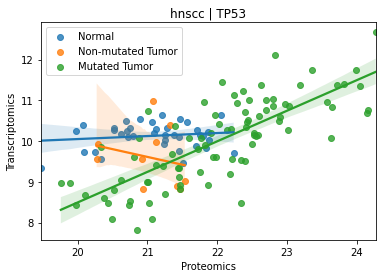

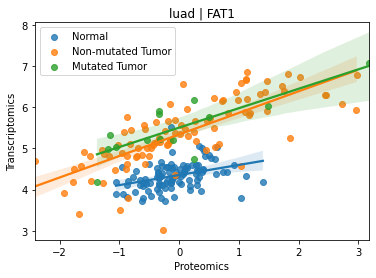

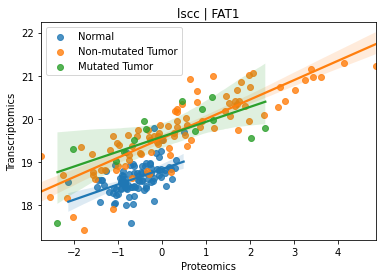

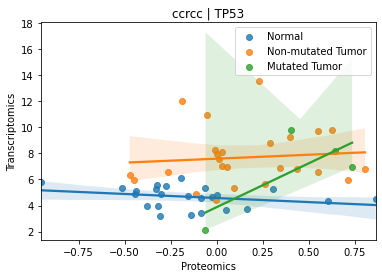

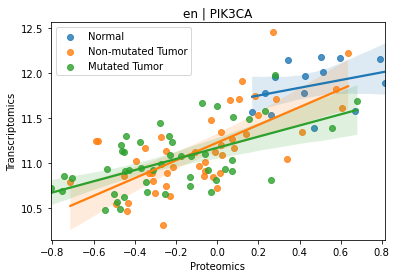

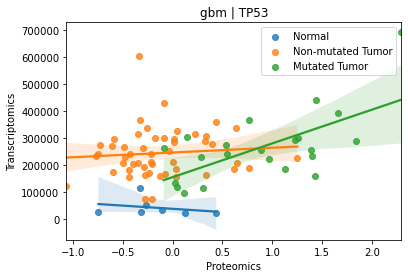

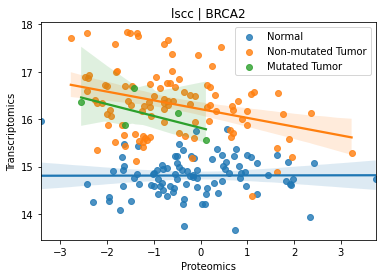

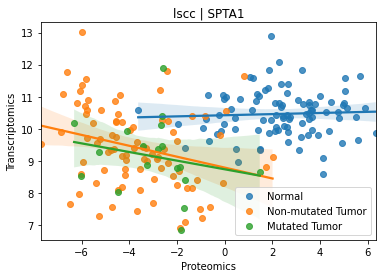

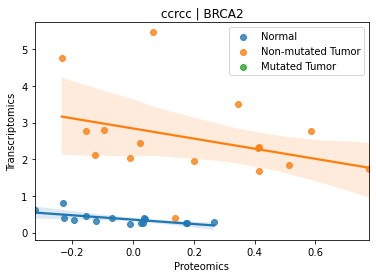

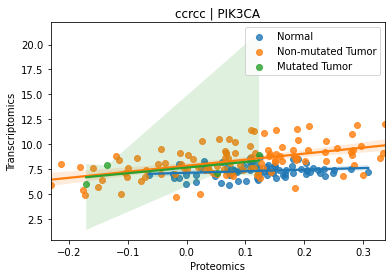

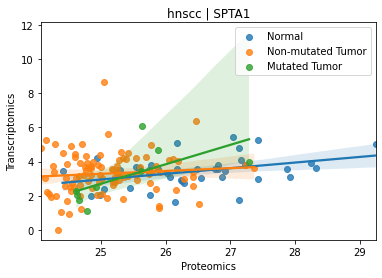

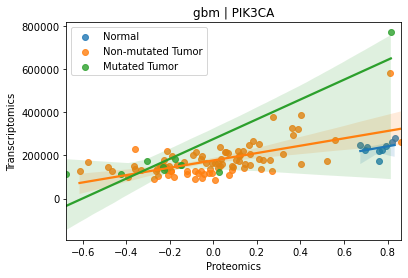

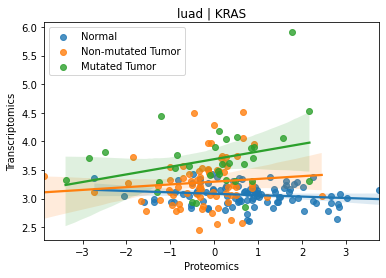

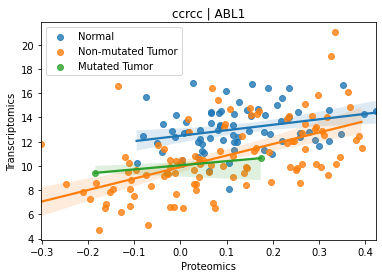

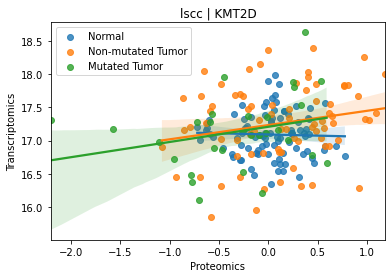

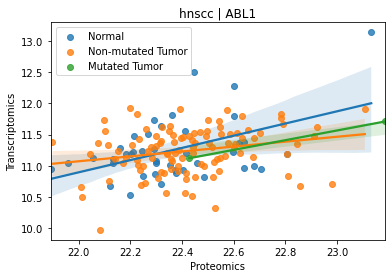

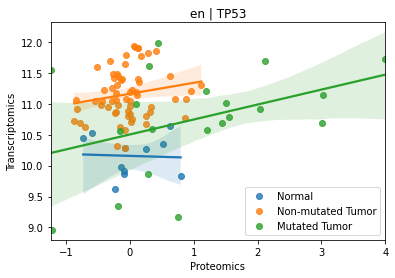

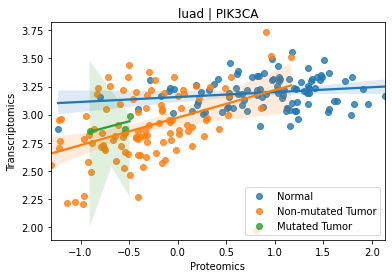

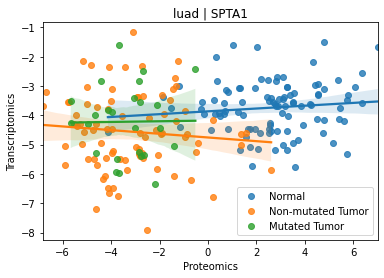

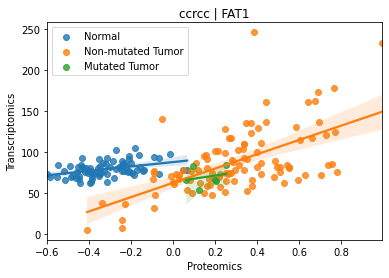

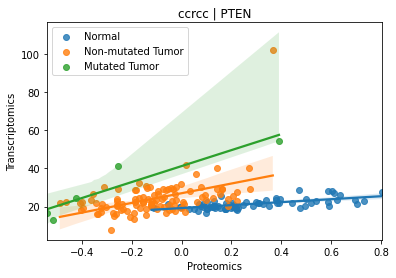

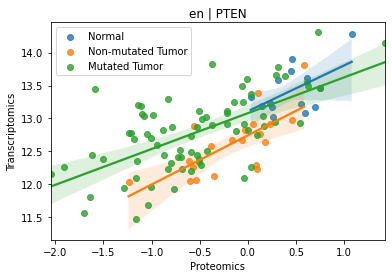

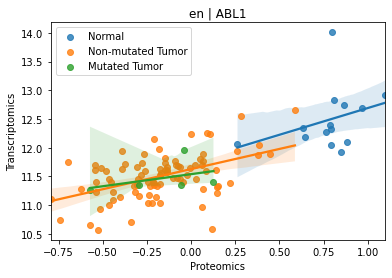

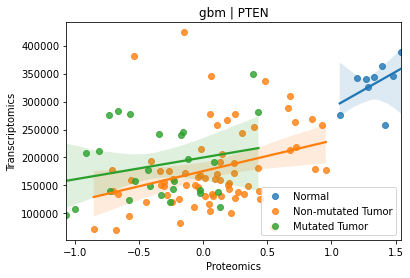

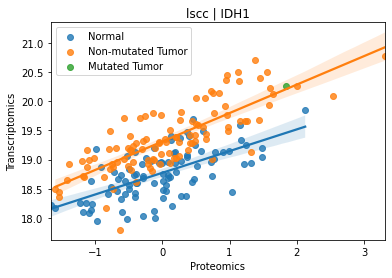

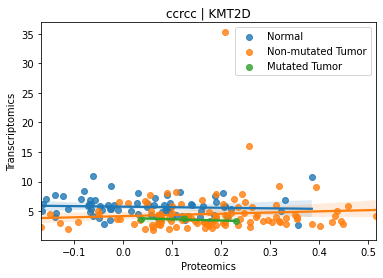

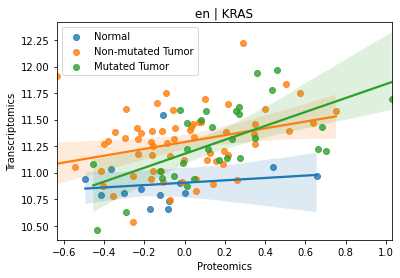

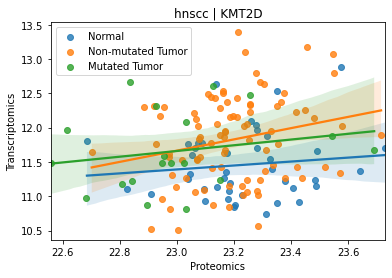

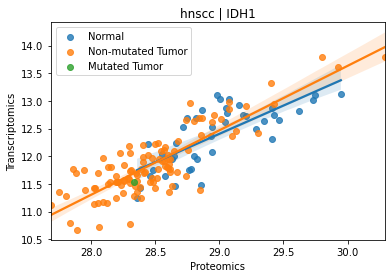

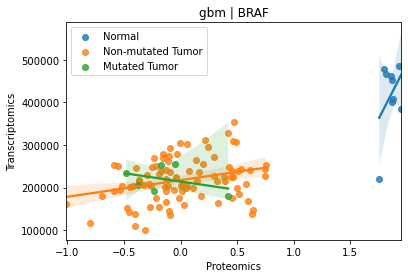

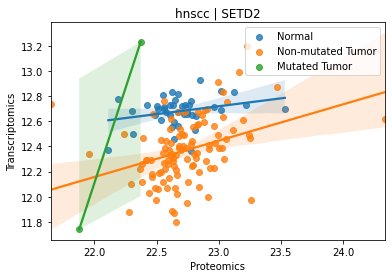

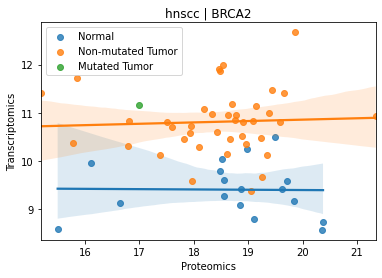

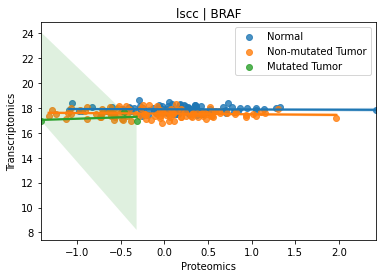

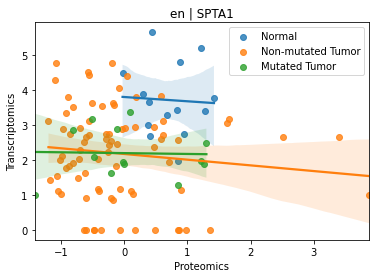

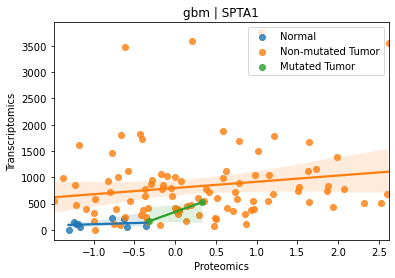

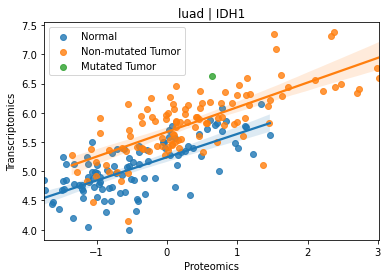

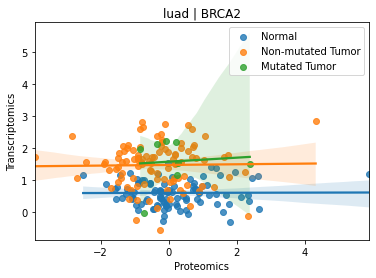

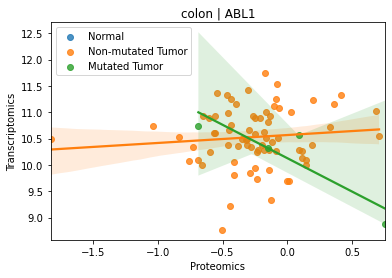

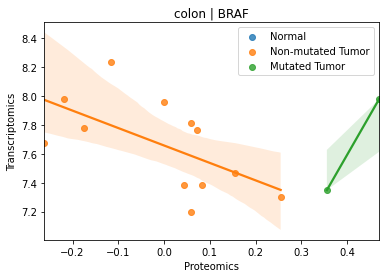

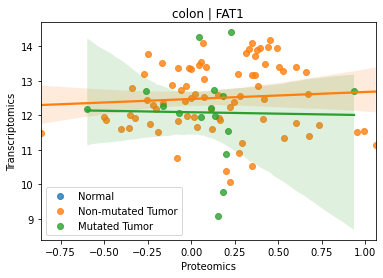

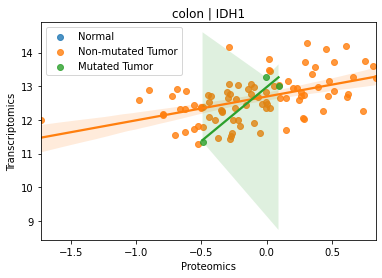

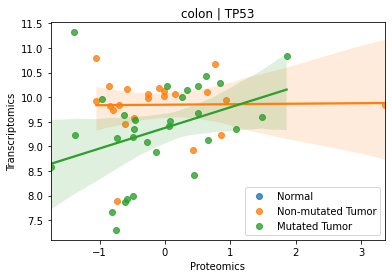

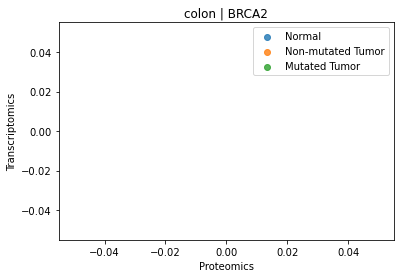

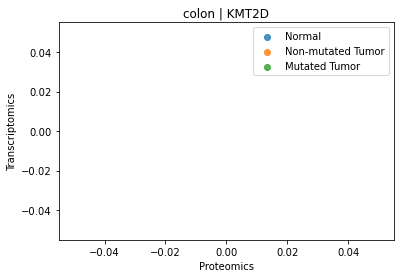

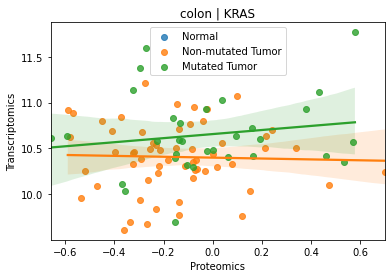

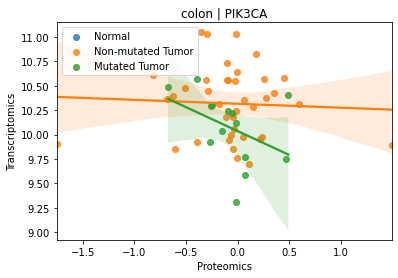

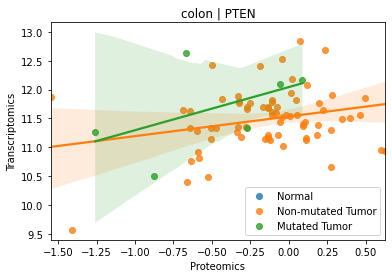

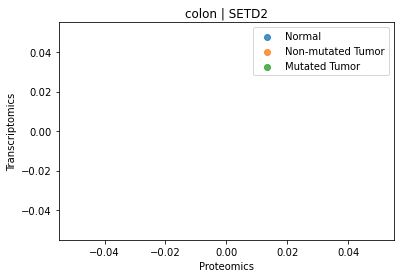

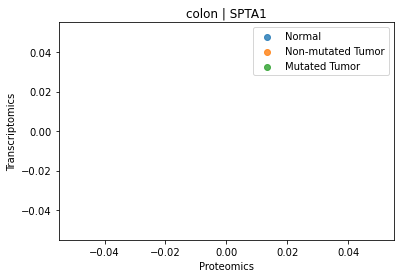

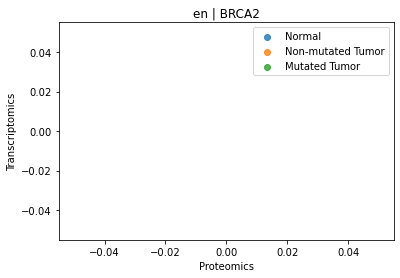

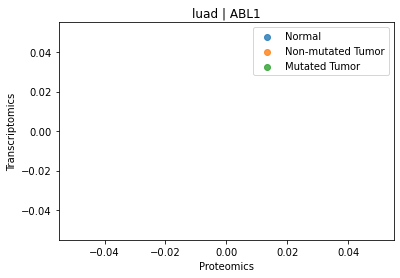

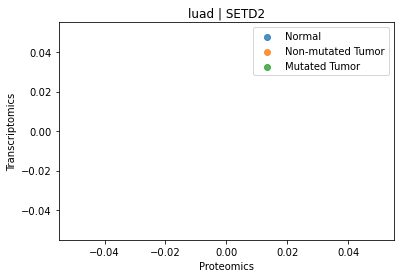

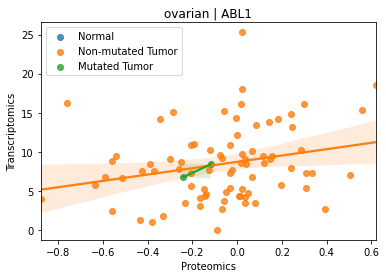

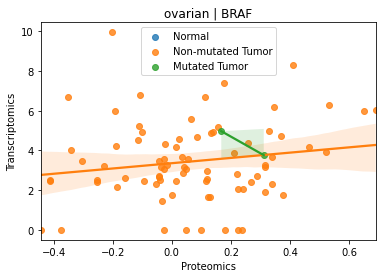

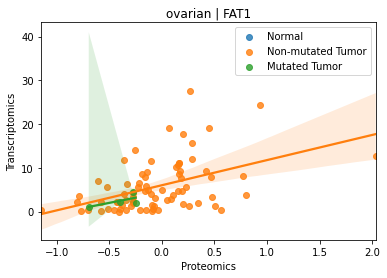

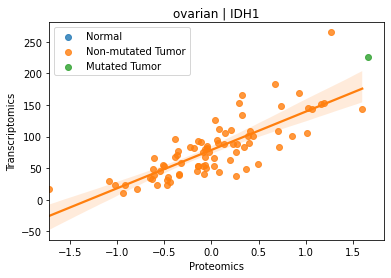

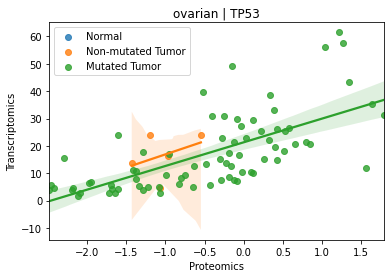

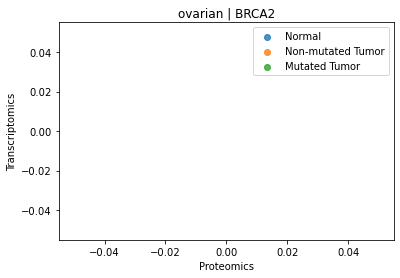

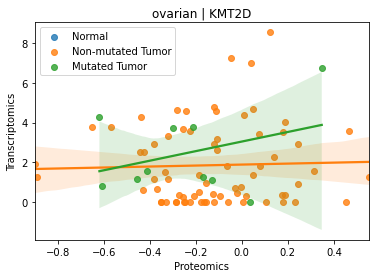

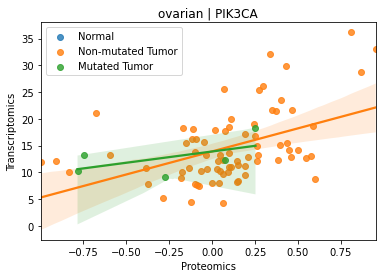

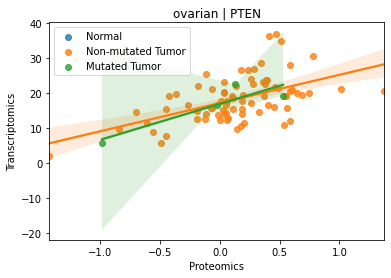

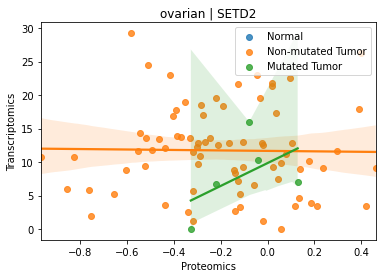

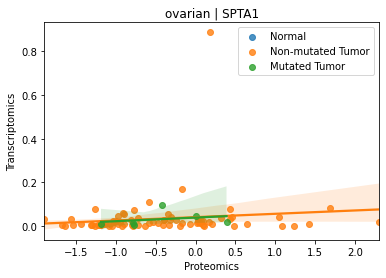

In [51]:
for index, df in enumerate(norm_vs_wt_tumor['gene_df']):
    
    is_norm = df['Type']=='normal'
    is_tum = df['Type'] == 'wt'
    is_mut = df['Type'] == 'mutation'
    ax = sns.regplot(x = 'Proteomics', y = 'Transcriptomics', data = df[is_norm], label = "Normal")
    ax = sns.regplot(x = 'Proteomics', y = 'Transcriptomics', data = df[is_tum], label = 'Non-mutated Tumor')
    ax = sns.regplot(x = 'Proteomics', y = 'Transcriptomics', data = df[is_mut], label = 'Mutated Tumor')
    ax.legend(loc = 'best')
    plt.title(str(norm_vs_wt_tumor['cancer'][index] + ' | ' + norm_vs_wt_tumor['gene'][index]))
    plt.show()